### Jupyter Notebook via Jupyterhub
* https://sites.google.com/a/lbl.gov/high-performance-computing-services-group/getting-started/jupyter-notebook
* select __ES1__ partition for GPU

In [ ]:
# !jupyter kernelspec list

__Select a TensorFlow kernel__: `Python3.6 TF-1.12`

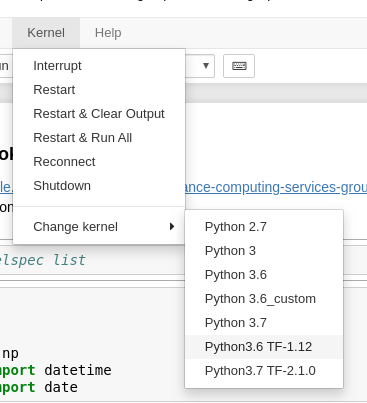

In [2]:
import sys
import os
import getpass
import numpy as np
from datetime import datetime
from datetime import date

In [3]:
system('hostname')

['n0009.es1']

Add the TF module into the systme path

In [4]:
import tensorflow as tf

/global/software/sl-7.x86_64/modules/langs/python/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
print(sys.version)

3.6.8 |Anaconda custom (64-bit)| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [6]:
print(tf.VERSION)

1.12.0


In [7]:
print(date.today())

2020-05-21


#### Test if TF can access a GPU

In [8]:
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)


True

#### Print the name of the GPU device

In [9]:
tf.test.gpu_device_name()

'/device:GPU:0'

__Run the code on a GPU or CPU__

In [13]:
device_name = tf.test.gpu_device_name()
#device_name = '/device:CPU:0'
shape = (3000, 3000)
with tf.device(device_name):
    random_matrix = tf.random_uniform(shape=shape, minval=0, maxval=1)
    dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
    sum_operation = tf.reduce_sum(dot_operation)
startTime = datetime.now()
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
        result = session.run(sum_operation)
        print(result)

print("Shape:", shape, "Device:", device_name)
print("Time taken:", datetime.now() - startTime)

6750205000.0
Shape: (3000, 3000) Device: /device:GPU:0
Time taken: 0:00:00.043736


In [14]:
#device_name = tf.test.gpu_device_name()
device_name = '/device:CPU:0'
shape = (3000, 3000)
with tf.device(device_name):
    random_matrix = tf.random_uniform(shape=shape, minval=0, maxval=1)
    dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
    sum_operation = tf.reduce_sum(dot_operation)
startTime = datetime.now()
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
        result = session.run(sum_operation)
        print(result)

print("Shape:", shape, "Device:", device_name)
print("Time taken:", datetime.now() - startTime)

6749143000.0
Shape: (3000, 3000) Device: /device:CPU:0
Time taken: 0:00:00.765788
